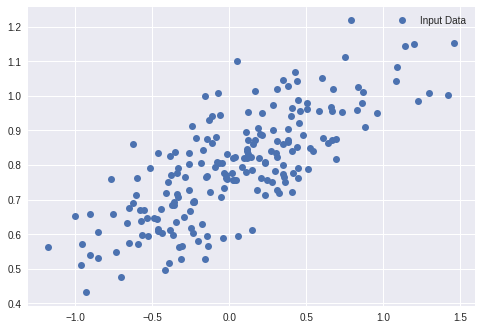

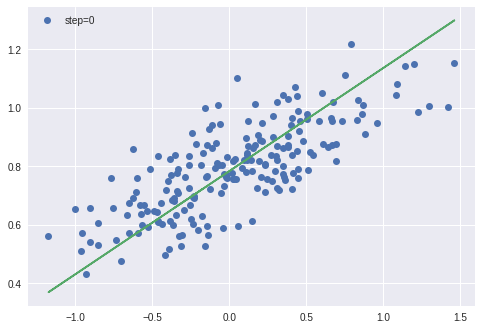

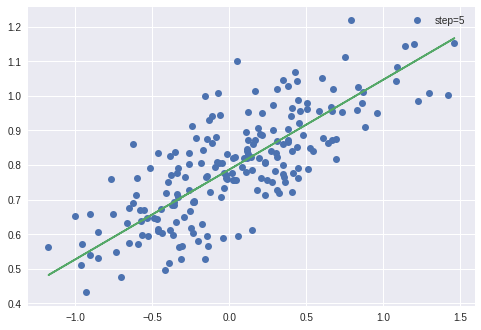

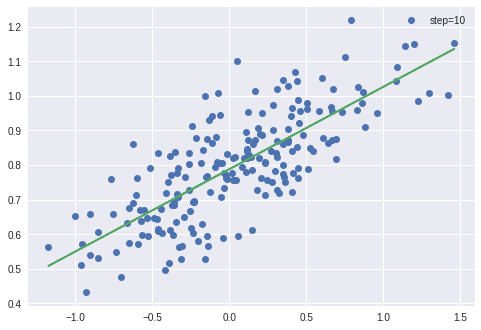

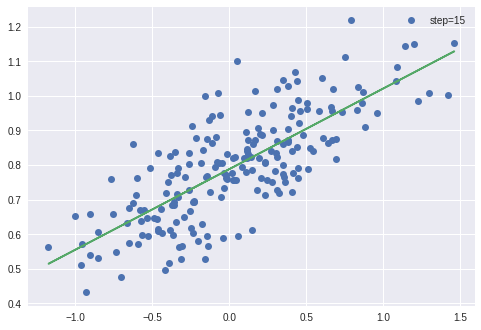

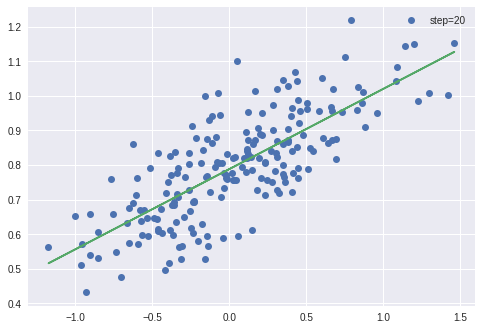

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

num_of_points =200
x_point =[]
y_point=[]
a=0.22
b=0.78

for i in range(num_of_points):
  x = np.random.normal(0.0,0.5)
  x_point.append([x])
  y = a*x+b+np.random.normal(0.0,0.1)
  y_point.append([y])
  
plt.plot(x_point,y_point,'o', label='Input Data')
plt.legend()
plt.show()

A = tf.Variable(tf.random_uniform([1],-1.0,1.0))
              
B = tf.Variable(tf.zeros([1]))
                
y=A*x_point +B
cost_function=tf.reduce_mean(tf.square(y - y_point))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train=optimizer.minimize(cost_function)
model=tf.initialize_all_variables()

with tf.Session() as sess:
	sess.run(model)
	for step in range(0,21):
		sess.run(train)
		if(step%5)==0:
			plt.plot(x_point, y_point, 'o', 
			label='step={}'
			.format(step))
			plt.plot(x_point, 
			sess.run(A)* 
			x_point+
			sess.run(B))
			plt.legend()
			plt.show()


In [5]:
import tensorflow as tf

vector = tf.constant([[4,5,6]], dtype=tf.float32)
eucNorm = tf.norm(vector, ord="euclidean")

with tf.Session() as sess:
  print(sess.run(eucNorm))


8.774964


In [9]:
import numpy as np
import tensorflow as tf

matrix1 = [[1.0,2.0],[3.0,4.0]]
matrix2 = np.array([[1.0,2.0], [3.0,4.0]], dtype = np.float32)
matrix3 = tf.constant([[1.0,2.0], [3.0,4.0]])

print(type(matrix1))
print(type(matrix2)) 
print(type(matrix3))

tensorForM1 = tf.convert_to_tensor( matrix1,dtype =tf.float32)
tensorForM2 = tf.convert_to_tensor( matrix2,dtype =tf.float32)
tensorForM3 = tf.convert_to_tensor( matrix3,dtype =tf.float32)

print(type(tensorForM1))
print(type(tensorForM2))
print(type(tensorForM3))

<class 'list'>
<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


In [3]:

import tensorflow as tf
mat1 = tf.constant( [[4,5,6],[3,2,1]] )
mat2 = tf.constant( [[ 7,8,9],[10,11,12]] )
mult = tf.multiply( mat1, mat2)
dotproduct = tf.matmul( mat1, tf.transpose(mat2))
with tf.Session() as sess:
  print(sess.run(mult))
  print(sess.run(dotproduct))


[[28 40 54]
 [30 22 12]]
[[122 167]
 [ 46  64]]


In [7]:
import tensorflow as tf
x=[[1,2,3],[4,5,6]]
x=tf.convert_to_tensor(x)
xtrans = tf.transpose(x)

y = ( [ [[1,2,3],[6,5,4]], [[4,5,6],[3,6,3]] ])
y =tf.convert_to_tensor(y)
ytrans = tf.transpose(y,perm=[0,2,1])

with tf.Session() as sess:
  print("--X--")
  print(sess.run(xtrans))
  print("--Y with perm--")
  print(sess.run(ytrans))


--X--
[[1 4]
 [2 5]
 [3 6]]
--Y with perm--
[[[1 6]
  [2 5]
  [3 4]]

 [[4 3]
  [5 6]
  [6 3]]]


In [9]:
# Code for linear equation 
import tensorflow as tf
#vars for equation 1
x1 = tf.constant(3, dtype=tf.float32)
y1 = tf.constant(2, dtype=tf.float32)
point1=tf.stack([x1,y1])
#vars for equation 2
x2 = tf.constant(4, dtype=tf.float32)
y2 = tf.constant(-1, dtype=tf.float32)
point2=tf.stack([x2,y2])
#solve for AX=C
X=tf.transpose(tf.stack ([point1,point2]))
C=tf.ones((1,2), dtype=tf.float32) # ones returns a matrix of all 1, with 1 row and 2 cols
A = tf.matmul(C, tf.matrix_inverse(X))
with tf.Session() as sess:
	X= sess.run(X)
	print(X)
	A = sess.run(A)
	print(A)
b= 1/A[0][1]
a= -b*A[0][0]
print( "Linear equation is: y={a}x+{b}".format(a=a,b=b)) 


[[ 3.  4.]
 [ 2. -1.]]
[[0.27272728 0.09090909]]
Linear equation is: y=-2.9999999999999996x+10.999999672174463


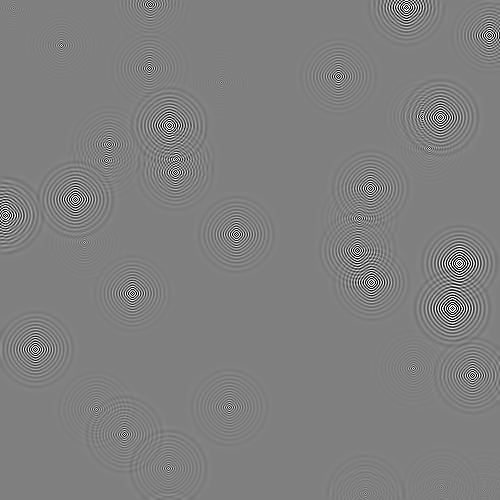

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#Imports for visualization
import PIL.Image
from io import BytesIO
from IPython.display import clear_output, Image, display

def DisplayArray(a, fmt='jpeg', rng=[0,1]):
  """Display an array as a picture."""
  a = (a - rng[0])/float(rng[1] - rng[0])*255
  a = np.uint8(np.clip(a, 0, 255))
  f = BytesIO()
  PIL.Image.fromarray(a).save(f, fmt)
  clear_output(wait = True)
  display(Image(data=f.getvalue()))

def make_kernel(a):
  """Transform a 2D array into a convolution kernel"""
  a = np.asarray(a)
  a = a.reshape(list(a.shape) + [1,1])
  return tf.constant(a, dtype=1)

def simple_conv(x, k):
  """A simplified 2D convolution operation"""
  x = tf.expand_dims(tf.expand_dims(x, 0), -1)
  y = tf.nn.depthwise_conv2d(x, k, [1, 1, 1, 1], padding='SAME')
  return y[0, :, :, 0]

def laplace(x):
  """Compute the 2D laplacian of an array"""
  laplace_k = make_kernel([[0.5, 1.0, 0.5],
                           [1.0, -6., 1.0],
                           [0.5, 1.0, 0.5]])
  return simple_conv(x, laplace_k)


N=500
u_init =np.zeros([N,N],dtype=np.float32)
ut_init = np.zeros([N, N], dtype=np.float32)

for n in range(40):
    a,b=np.random.randint(0,N,2)
    u_init[a,b]=np.random.uniform()

DisplayArray(u_init, rng=[-0.1, 0.1])

sess = tf.InteractiveSession()

# Parameters:
# eps -- time resolution
# damping -- wave damping
eps = tf.placeholder(tf.float32, shape=())
damping = tf.placeholder(tf.float32, shape=())

# Create variables for simulation state
U  = tf.Variable(u_init)
Ut = tf.Variable(ut_init)

# Discretized PDE update rules
U_ = U + eps * Ut
Ut_ = Ut + eps * (laplace(U) - damping * Ut)

# Operation to update the state
step = tf.group(
  U.assign(U_),
  Ut.assign(Ut_))

# Initialize state to initial conditions
tf.global_variables_initializer().run()

# Run 1000 steps of PDE
for i in range(1000):
  # Step simulation
  step.run({eps: 0.03, damping: 0.04})
  DisplayArray(U.eval(), rng=[-0.1, 0.1])
